

#**Title of ML project: Bank Customer Turnover (Churn) Prediction**


---



**Name:** Syama Nidheesh

**Organization:** Entri Elevate

**Date:** 21/11/2025



---
#**1. Overview of Problem Statement:**

Customer churn, also known as customer turnover, refers to customers discontinuing their relationship with a bank by closing accounts or stopping the use of services. For financial institutions, customer retention is critically important because acquiring new customers is more costly than retaining existing ones. Understanding why customers leave and identifying those at high risk of churn enables banks to take proactive measures to improve loyalty and service quality.

In this project, the objective is to analyze customer data and build a predictive model that can accurately identify customers who are likely to churn. Using a combination of Exploratory Data Analysis (EDA), feature extraction, and machine learning algorithms, the project aims to uncover key factors influencing churn and develop a reliable prediction system. This insight can help banks create targeted retention strategies, enhance customer satisfaction, and strengthen long-term customer relationships.


---



#**2. Objectives:**

---



1.   **Understand the Dataset**

      To explore and understand the given customer dataset through basic analysis, identifying patterns and relationships among variables that may influence customer churn.
2.   **Preprocess the Data**

      To clean and prepare the dataset by handling missing values, encoding categorical variables, scaling numerical features, and splitting data for model training and testing.
3.    **Build Churn Prediction Models**

      To develop machine learning models such as Logistic Regression, Decision Tree, Random Forest, KNN, and SVM to classify whether a customer will churn (1) or not churn (0).
4.    **Evaluate Model Performance**

      To assess each model using evaluation metrics such as accuracy, precision, recall, F1-score, and confusion matrix to determine the best-performing model.
5.    **Identify Important Features**

      To analyze feature importance or coefficients to understand which customer attributes contribute most to predicting churn.
6.    **Predict Customer Churn**

      To use the best-performing model to make final predictions on whether a customer is likely to churn based on input features.




---



#**3. Data Description:**


---

**Source of Data:**

Kaggle – Bank Customer Churn Modelling Dataset

Features in the Dataset

The dataset contains 10,000 customer records with the following features:

1. Feature Name:	Description
2. RowNumber:	Row index (not useful for prediction)
3. CustomerId	: Unique ID assigned to each customer
4. Surname:	Customer's surname
5. CreditScore:	Credit score of the customer
6. Geography:	Country of the customer (France, Spain, Germany)
7. Gender:	Male or Female
8. Age:	Customer's age
9. Tenure: Number of years the customer has stayed with the bank
10. Balance:	Account balance of the customer
11. NumOfProducts:	Number of products the customer has purchased (1–4)
12. HasCrCard:	Whether the customer has a credit card (1 = Yes, 0 = No)
13. IsActiveMember:	Whether the customer is an active member (1 = Active, 0 = Not Active)
14. EstimatedSalary:	Estimated yearly salary of the customer
15. Exited:	Target variable → 1 = customer churned, 0 = customer stayed






In [ ]:
# Import the libraries
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline as ImbPipeline
warnings.filterwarnings("ignore")


---

#**4. Data Collection:**



---

In [ ]:
# import the dataset

file1=files.upload()

Saving Churn_Modelling.csv to Churn_Modelling (4).csv


In [ ]:
bank_churn=pd.read_csv("Churn_Modelling.csv")
bank_churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Shape of dataset
print(f"\n Dataset Shape: {bank_churn.shape}")


 Dataset Shape: (10000, 14)


In [ ]:
# Column names
print("\n Columns:\n")
print(bank_churn.columns.tolist())


 Columns:

['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [ ]:
# Basic Information
print("\n Dataset Info:\n")
print(bank_churn.info())


 Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


In [ ]:
print("\nSummary statistics (numerical):")
bank_churn.describe().transpose()


Summary statistics (numerical):


,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48




---


#**5. Data Preprocessing - Data Cleaning:**


---

Data cleaning is an important step to ensure the dataset is accurate and ready for analysis. It involves handling missing values so the model does not face errors or learn misleading patterns, removing outliers that can distort the results and reduce model accuracy, and correcting skewed numerical features through appropriate transformations to improve model stability. These steps help improve data quality, reduce noise, and ensure that the machine learning model can learn meaningful patterns for accurate churn prediction.


In [ ]:
# drop the columns RowNumber,CustomerId and surname as it do not influence churn
bank_churn = bank_churn.drop(["RowNumber","CustomerId","Surname"], axis=1)
bank_churn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Shape of dataset after removing unwanted columns
print(f"\n Dataset Shape: {bank_churn.shape}")


 Dataset Shape: (10000, 11)


In [ ]:
# Check for wrong values
print(f"\nUnique values in categorical columns:")
print(f"Geography: {bank_churn['Geography'].unique()}")
print(f"Gender: {bank_churn['Gender'].unique()}")
print(f"NumOfProducts: {sorted(bank_churn['NumOfProducts'].unique())}")



Unique values in categorical columns:
Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']
NumOfProducts: [np.int64(1), np.int64(2), np.int64(3), np.int64(4)]


In [ ]:
# Check for impossible values
print(f"\nValue Ranges:")
print(f"Age: {bank_churn['Age'].min()} to {bank_churn['Age'].max()}")
print(f"CreditScore: {bank_churn['CreditScore'].min()} to {bank_churn['CreditScore'].max()}")
print(f"Balance: {bank_churn['Balance'].min()} to {bank_churn['Balance'].max()}")


Value Ranges:
Age: 18 to 92
CreditScore: 350 to 850
Balance: 0.0 to 250898.09


In [ ]:
#Check statistical values for fields with other than numerical datatype
bank_churn.describe(exclude=np.number).T

,count,unique,top,freq
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


In [ ]:
# Check for missing values
# No action need since there is no missing values
print("\n Missing Values:\n")
print(bank_churn.isna().sum())


 Missing Values:

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [ ]:
#Check for duplicate

duplicate_rows=bank_churn.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


In [ ]:
num_cols=bank_churn.select_dtypes(include=['int64','float64']).columns
num_cols.tolist()

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [ ]:
cat_cols=bank_churn.select_dtypes(include=['object']).columns
cat_cols.tolist()

['Geography', 'Gender']

####**Key Findings:**


---


*   **Clean Data**: The dataset has no missing values, so we can analyze it without any data gaps.

*  No wrong values in categorical columns



*   Geography: France, Spain, Germany (3 countries)
*   Gender: Male, Female (properly encoded)
*   NumOfProducts: 1-4 products per customer
*   All values within reasonable ranges




*   **Removing Unnecessary Columns**: We are dropping the columns 'RowNumber', 'CustomerId', and 'Surname' from the dataset as they uniquely identify each customer and do not provide any relevant information for building the customer churn model. Removing these columns allows us to focus on the meaningful features that contribute to predicting churn and improve the efficiency of our analysis.


* **Target Variable**: The column “Exited” is our main focus, as it tells us whether a customer has churned or not. This will be used to train the prediction model.







In [ ]:
outlier_summary = {}
outlier_col=num_cols.drop('Exited')
for col in outlier_col:
    Q1 = bank_churn[col].quantile(0.25)
    Q3 = bank_churn[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = bank_churn[(bank_churn[col] < lower) | (bank_churn[col] > upper)][col]

    outlier_summary[col] = {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Lower Bound': lower,
        'Upper Bound': upper,
        'Outlier Count': len(outliers)
    }

pd.DataFrame(outlier_summary).T


,Q1,Q3,IQR,Lower Bound,Upper Bound,Outlier Count
CreditScore,584.00,718.0000,134.0000,383.00000,919.00000,15.0
Age,32.00,44.0000,12.0000,14.00000,62.00000,359.0
Tenure,3.00,7.0000,4.0000,-3.00000,13.00000,0.0
Balance,0.00,127644.2400,127644.2400,-191466.36000,319110.60000,0.0
NumOfProducts,1.00,2.0000,1.0000,-0.50000,3.50000,60.0
HasCrCard,0.00,1.0000,1.0000,-1.50000,2.50000,0.0
IsActiveMember,0.00,1.0000,1.0000,-1.50000,2.50000,0.0
EstimatedSalary,51002.11,149388.2475,98386.1375,-96577.09625,296967.45375,0.0


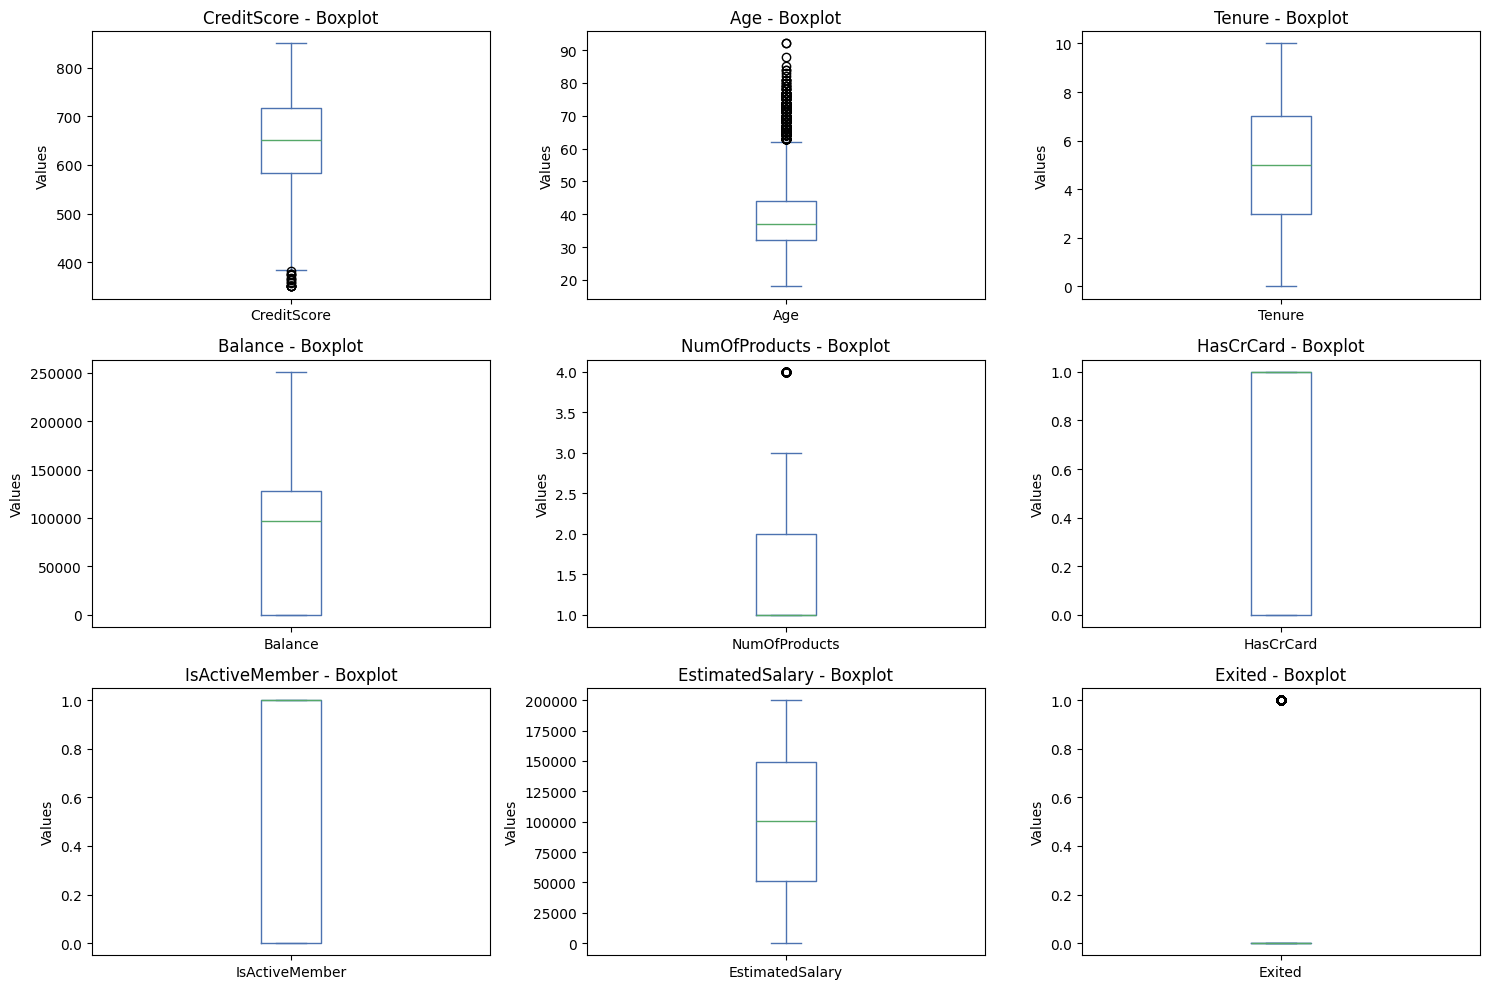

In [ ]:
# Visualize outliers
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(num_cols):
    bank_churn[col].plot(kind='box', ax=axes[i], title=f'{col} - Boxplot')
    axes[i].set_ylabel('Values')

plt.tight_layout()
plt.show()

####**Key Findings:**


---
Outlier detection was performed using the Interquartile Range (IQR) method. The IQR method mathematically identifies values that fall below:

Lower Bound = Q1 – 1.5 × IQR

Upper Bound = Q3 + 1.5 × IQR

Here we do not remove or cap any outliers, for the reasons explained below:


> Outlier analysis was performed using the IQR method. Although some features such as CreditScore, Age, and NumOfProducts showed statistical outliers, these values were retained because they represent **genuine customer behavior** rather than data errors.

> In a banking dataset, high-value customers, older customers, and low/high credit score customers are crucial segments that significantly influence churn behavior. Removing or capping these values would lead to **loss of meaningful information**, distort model learning, and reduce real-world applicability.

> Therefore, **no outliers were removed**, as all identified extreme values are valid business observations and important for accurate churn prediction.







#  **6.  Exploratory Data Analysis**

##  **6.1 Target Variable - Exited**

**Summary**
1. Understanding "Exited": The variable "Exited" represents whether a customer is an existing customer (0) or a churned customer (1), offering valuable insights into customer retention.
2. Data Imbalance: The dataset is skewed, with approximately 80% of the data representing existing customers and 20% representing churned customers. This imbalance requires careful handling during model development to ensure accurate predictions and unbiased results.

In [ ]:
#Distribution
# since it is 80% and 20%, it is imbalanced data. We need to SMOTE the dataset after splitting for training purpose
bank_churn['Exited'].value_counts(normalize=True)*100

,proportion
Exited,
0,79.63
1,20.37


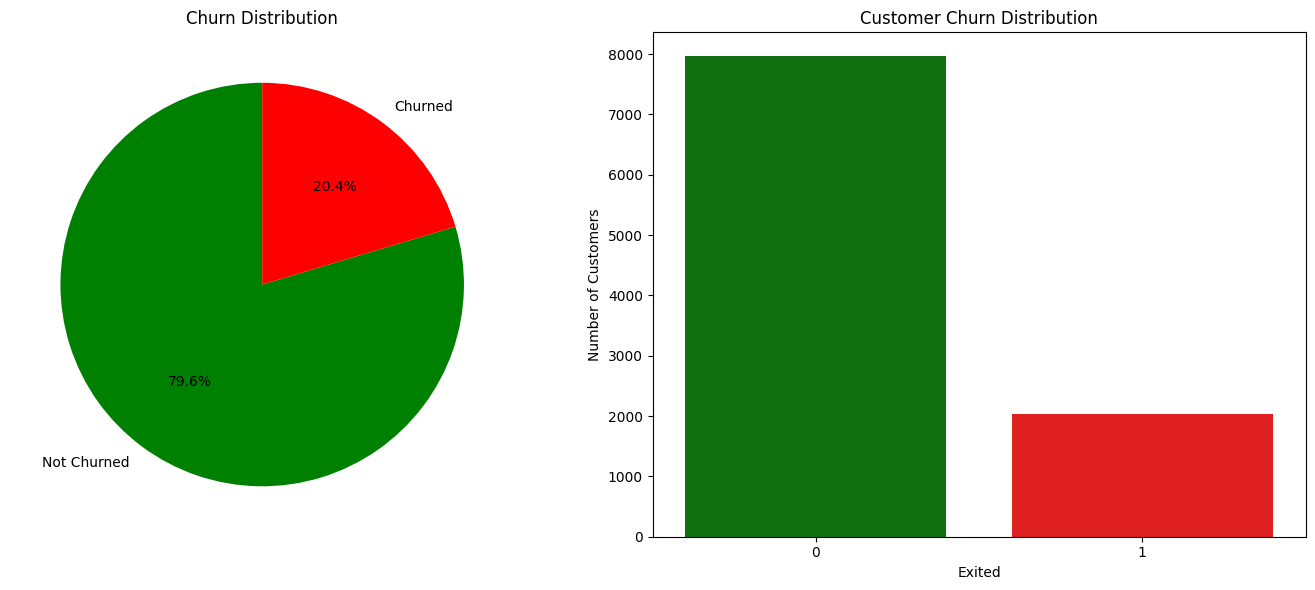

In [ ]:
# Define colors (same order as value_counts: 0 then 1)
colors = ['green', 'red']

plt.figure(figsize=(14, 6))

# --- Left plot: Pie chart ---
plt.subplot(1, 2, 1)
churn_counts = bank_churn['Exited'].value_counts().sort_index()  # ensures 0 then 1
plt.pie(
    churn_counts.values,
    labels=['Not Churned', 'Churned'],
    autopct='%1.1f%%',
    startangle=90,
    colors=colors
)
plt.title('Churn Distribution')

# --- Right plot: Countplot ---
plt.subplot(1, 2, 2)
sns.countplot(
    data=bank_churn,
    x='Exited',
    palette=colors
)
plt.xlabel('Exited')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Distribution')

plt.tight_layout()
plt.show()

##  **6.2 Univariate Analysis – Numerical Features**

Covariate analysis in EDA for numerical features is important because it allows us to understand the underlying structure, behavior, and distribution of the data before building a predictive model. Numerical variables such as age, credit score, balance, and salary often contain natural variations, trends, and patterns that influence customer behavior—in this case, churn. By examining their distributions through histograms, KDE plots, and boxplots, we can identify skewness, variability, and the presence of meaningful extremes that may affect the model. This helps determine whether outlier handling is needed and whether any transformations, such as scaling or normalization, would improve model performance. Understanding these distributions also reveals whether the data contains biologically or economically plausible values, ensuring the dataset is realistic and trustworthy.








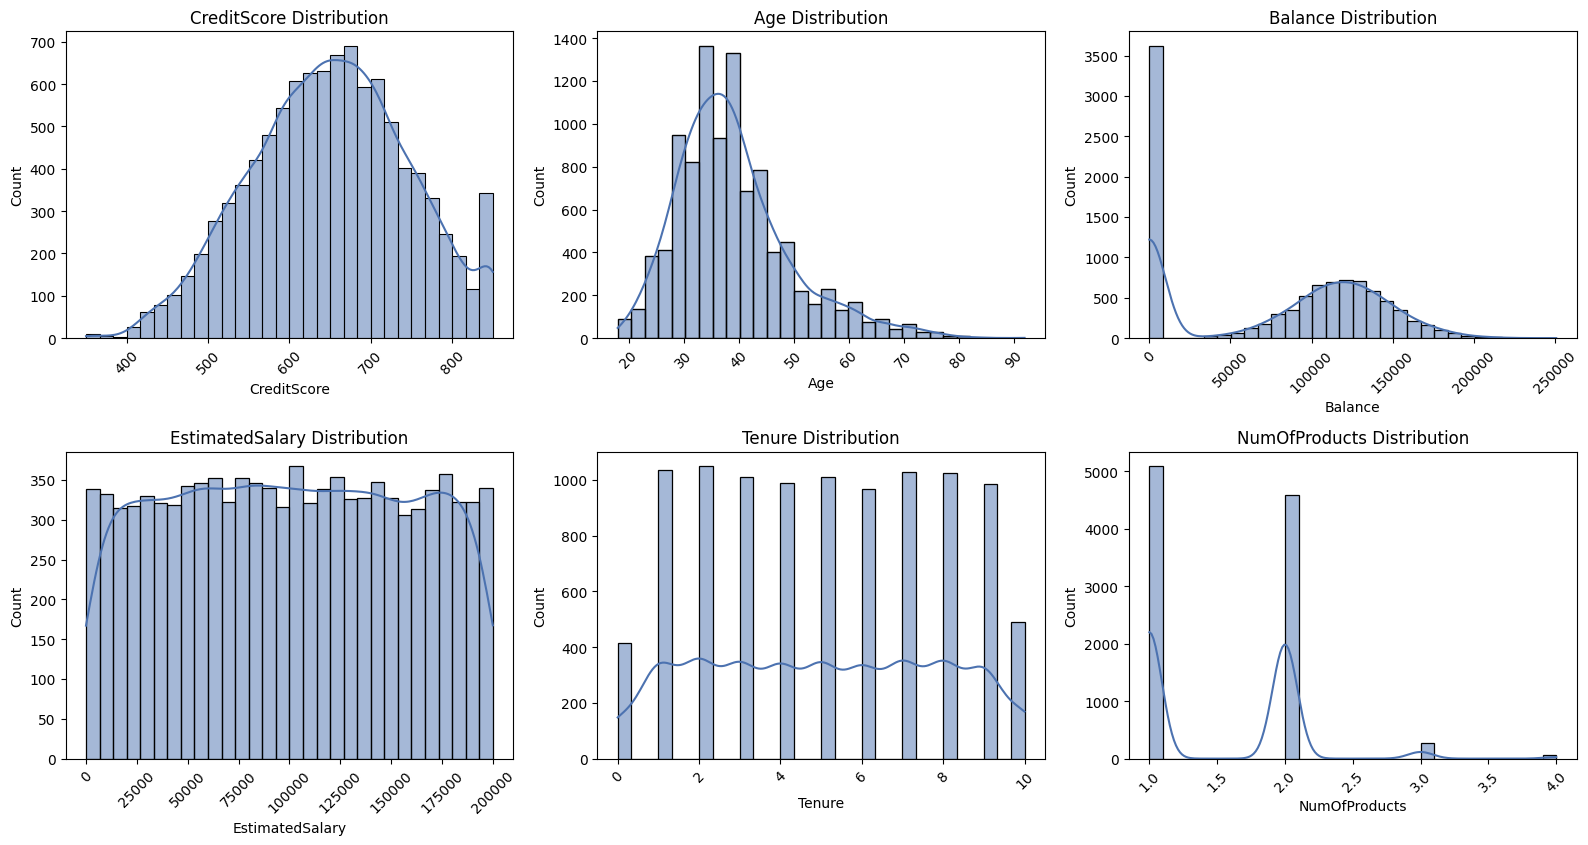

In [ ]:
# Numerical features distribution - FIXED VERSION
plt.figure(figsize=(16, 12))

# Numerical features distribution
numerical_features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Tenure', 'NumOfProducts']

for i, feature in enumerate(numerical_features, 1):  # Start from position 2
    plt.subplot(3, 3, i)
    sns.histplot(data=bank_churn, x=feature, kde=True, bins=30)
    plt.title(f'{feature} Distribution')
    plt.xticks(rotation=45)
    plt.tight_layout(pad=3.0)  # Add padding between subplots

plt.tight_layout()
plt.show()

*  The **CreditScore** variable shows an approximately normal distribution centered around 650, with most customers falling between 550 and 750. Only a very small number of observations lie at the extreme lower and upper ends, indicating minimal natural variability rather than erroneous values. This suggests that the bank’s customers generally have stable credit behavior, and no outlier treatment is necessary for this feature.

*   The **Age** distribution is right-skewed, meaning most customers are between 30 and 45 years old, with a gradual decline in frequency as age increases. While the IQR method detects many statistical outliers above the upper bound, these represent real older customers rather than data errors. Since age naturally varies and older customers often have distinct churn patterns, removing or modifying these values would distort the dataset. Therefore, age-related outliers should not be treated.



*   The **Balance** distribution exhibits a bimodal pattern. A large proportion of customers hold a zero balance, forming a high spike near zero, while the rest have balances spread between 50,000 and 150,000. Zero balances are common in banking datasets (e.g., salary accounts or dormant accounts), so these are not actual outliers. The rest of the distribution is smooth and realistic. For this reason, no outlier removal or capping is required for balance.
*   The **EstimatedSalary** variable appears uniformly distributed across its entire range. This suggests that salary values were sampled evenly or synthetically generated, which means there are no extreme deviations that need treatment. Since each salary bracket is equally represented, the feature does not show inherently problematic behavior, and outlier handling is unnecessary.



*   The **Tenure** distribution is also uniform across all values from 0 to 10 years. This indicates an equal representation of customers across different tenure levels, likely due to deliberate sampling. No unusual or extreme values exist in this feature, and therefore no outlier handling is required. Tenure remains an important behavioral variable, especially in churn prediction, but does not require any cleaning.


*   The **NumOfProducts** variable shows heavy concentration at 1 and 2 products, with very few customers having 3 or 4 products. While 3 and 4 appear as statistical outliers in a numerical sense, they are actually valid categories representing genuine customer behavior. Customers with multiple products are often more engaged and less likely to churn, making these values important. Treating them as outliers would lead to loss of crucial retention-related patterns.



##  **6.3 Bivariate Analysis**

Bivariate analysis helps us to understand the relationship between two variables at a time. Instead of looking at each variable individually, bivariate analysis shows how one variable influences or interacts with another—for example, how income affects spending or how age impacts churn rate. This helps identify correlations, trends, or differences that are useful for better insights and decision-making.



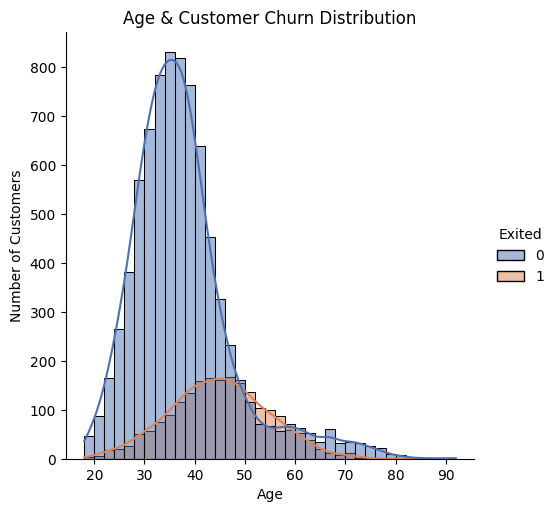

In [ ]:
palette = "deep"
sns.set_palette(palette)

sns.displot(data=bank_churn, x='Age', hue='Exited',kde=True, bins=37)

plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.title('Age & Customer Churn Distribution')

plt.show()


**Age VS Target**

The customer age in the dataset ranges from 18 to 92 years, with an average of around 39, indicating a diverse customer base across different life stages. The age distribution is right-skewed, meaning there are fewer customers in the older age groups compared to younger and middle-aged customers. However, churn behavior varies significantly across age segments. In particular, customers between 50 and 60 years show a notably high churn rate of approximately 56%, making them the most vulnerable group in terms of attrition. This pattern highlights the importance of considering age as a key predictor of churn and underscores the need for targeted retention strategies tailored specifically for customers in this higher-risk age bracket.

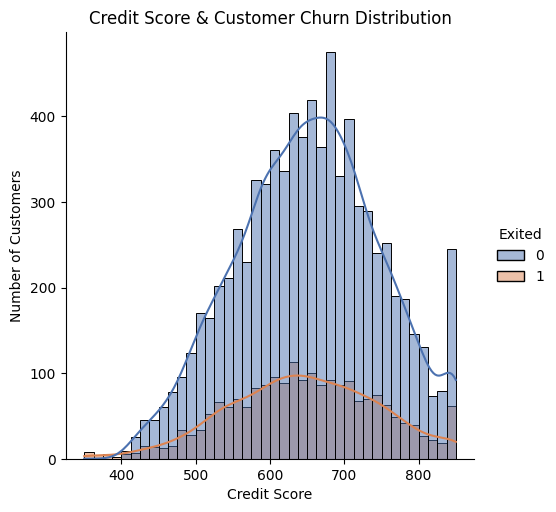

In [ ]:
palette = "deep"
sns.set_palette(palette)

sns.displot(data=bank_churn, x='CreditScore',hue='Exited', kde=True, bins=40)

plt.xlabel('Credit Score')
plt.ylabel('Number of Customers')
plt.title('Credit Score & Customer Churn Distribution')

plt.show()

**Credit Score VS Target**

**Credit Score Range:** The credit scores of customers range from 350 to 850, reflecting the variation in their financial health.

**Churned Customers:** Notably, all customers with credit scores below 400 have churned. This shows that credit score plays a key role in customer retention, making it important to help customers improve their credit to keep them from leaving.

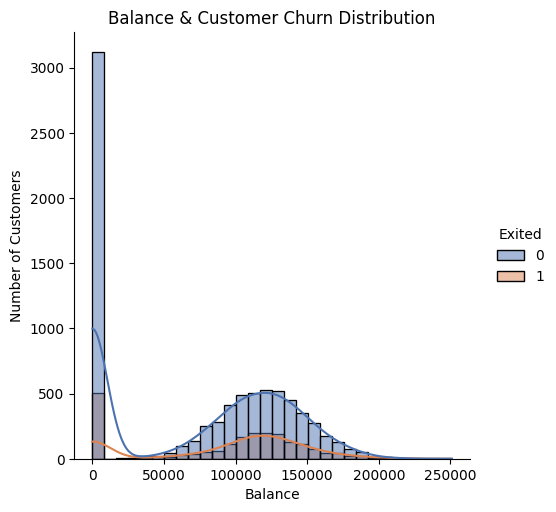

In [ ]:
palette = "deep"
sns.set_palette(palette)

sns.displot(data=bank_churn, x='Balance', hue='Exited',kde=True, bins=30)

plt.xlabel('Balance')
plt.ylabel('Number of Customers')
plt.title('Balance & Customer Churn Distribution')

plt.show()


**Balance VS Target**

When comparing account balance with churn, we observe that churners are more likely to have either very low balances or no balance at all, suggesting weak engagement with the bank. Many customers who churn do not actively use their accounts, which makes them more likely to leave. There is also a smaller group of churners with very high balances, indicating that even some high-value customers choose to exit, possibly due to better offers elsewhere. Overall, churners tend to appear more at the extreme ends of the balance range, while customers in the middle balance range are less likely to churn.

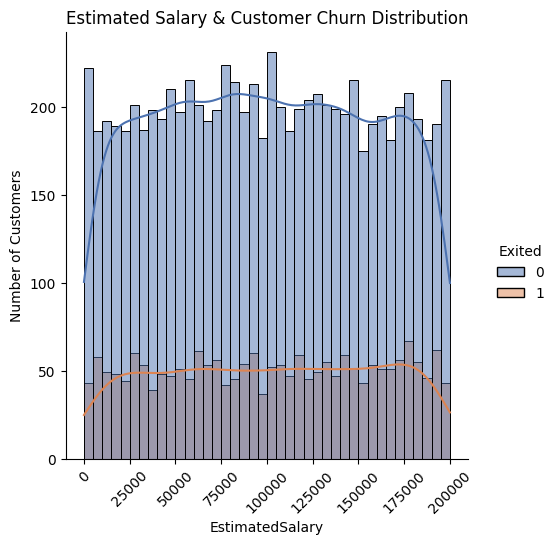

In [ ]:
palette = "deep"
sns.set_palette(palette)

sns.displot(data=bank_churn, x='EstimatedSalary',hue='Exited', kde=True, bins=40)

plt.xlabel('EstimatedSalary')
plt.ylabel('Number of Customers')
plt.title('Estimated Salary & Customer Churn Distribution')
plt.xticks(rotation=45)

plt.show()

**EstimatedSalary VS Target**

The estimated salary of customers ranges from as low to high, showing that the dataset includes customers from a wide variety of income levels. The salary distribution is evenly spread across this entire range, meaning no particular income group dominates the dataset. Similarly, churn rates are fairly uniform across all salary levels, with no clear pattern indicating that higher- or lower-income customers are more likely to leave. This suggests that estimated salary, on its own, does not have a strong influence on churn and may not be a key driver of customer exit behavior.

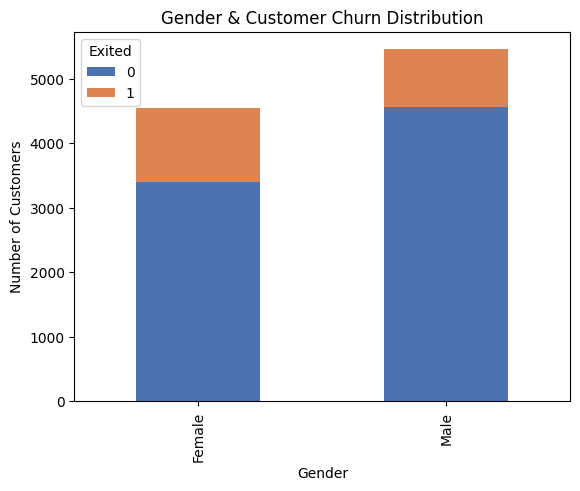

In [ ]:
palette = "deep"
sns.set_palette(palette)

pd.crosstab(bank_churn['Gender'], bank_churn['Exited']).plot(kind='bar', stacked=True)

plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.title('Gender & Customer Churn Distribution')

plt.show()

**Gender VS Target**

When comparing churn rates across genders, there is a meaningful difference. In this dataset, female customers show a higher churn rate (approximately 23%), while male customers have a lower churn rate (around 17–19%). This indicates that women are more likely to leave the bank compared to men. The difference suggests that gender may play a role in customer behavior, and the bank may need to pay additional attention to retention strategies for female customers.

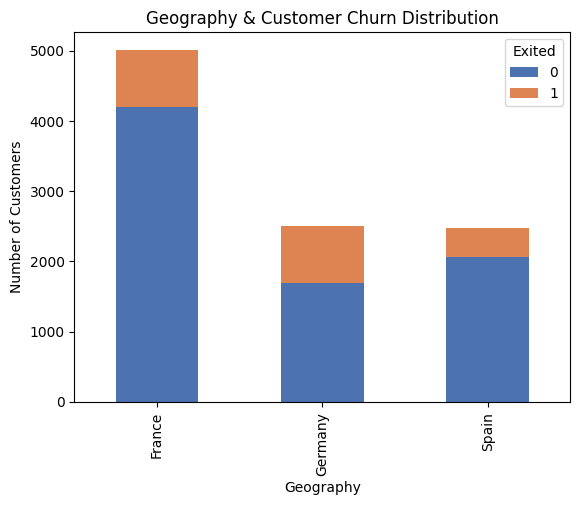

In [ ]:
palette = "deep"
sns.set_palette(palette)

pd.crosstab(bank_churn['Geography'], bank_churn['Exited']).plot(kind='bar', stacked=True)

plt.xlabel('Geography')
plt.ylabel('Number of Customers')
plt.title('Geography & Customer Churn Distribution')

plt.show()

**Geography VS Target**

Churn rates vary noticeably across different geographic regions. Among the three geographies—France, Spain, and Germany—Germany shows the highest churn percentage, indicating that customers living in this region are more likely to leave the bank. Spain has a moderate churn rate, while France records the lowest churn percentage, meaning customers there tend to remain with the bank. These differences suggest that localized factors—such as customer service quality, competition from other banks, or economic conditions—may be influencing churn behavior. Understanding these regional variations can help the bank target specific areas with higher churn for improved customer engagement and retention.

##**6.3 Multivariate analysis**

Multivariate analysis is needed when we want to study more complex situations involving multiple variables at once. Real-world data often includes many factors influencing an outcome, and multivariate analysis allows us to understand their combined effect. It helps identify key predictors, reduce noise, and build more accurate and reliable models—especially important in machine learning and data-driven projects.

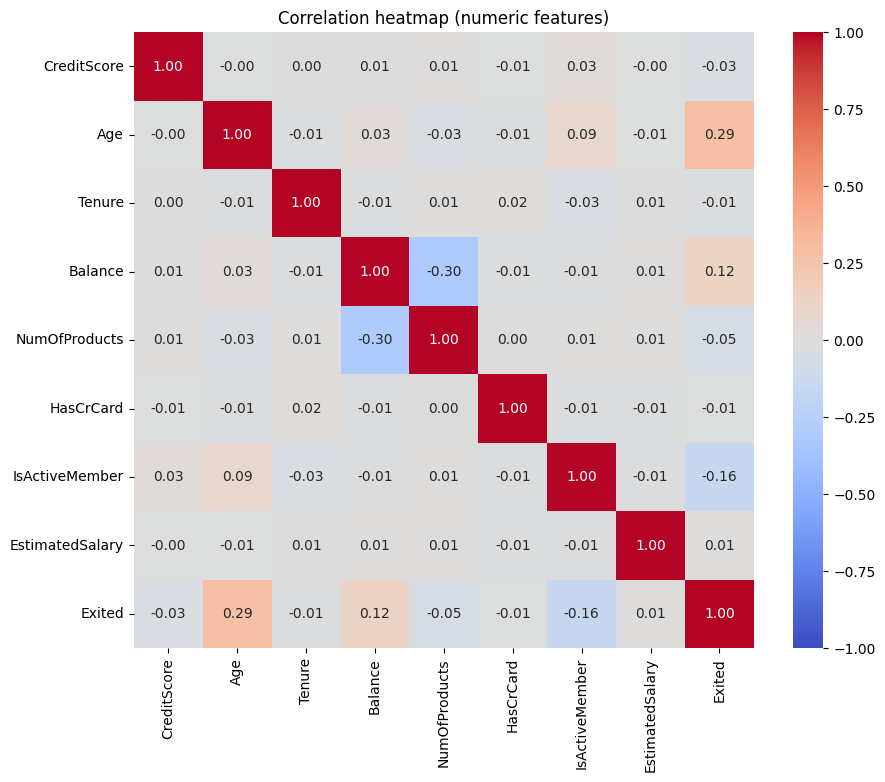

In [ ]:
plt.figure(figsize=(10,8))
num_for_corr = bank_churn.select_dtypes(include=[np.number])
corr = num_for_corr.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation heatmap (numeric features)")
plt.show()


When examining the correlation matrix, there are very few feature pairs with high correlation values above 0.6, indicating that multicollinearity is not a major issue in this dataset. Most numerical variables are only weakly related to each other, which means each feature contributes unique information to the model. However, when looking at the correlation of each feature with the target variable Exited, a few meaningful patterns emerge. Variables such as Age, Balance, and IsActiveMember show the strongest relationships with churn—Age and Balance have a positive relationship, meaning higher values are associated with a higher likelihood of churn, while IsActiveMember has a clear negative relationship, showing that active customers are less likely to leave. In contrast, CreditScore, Tenure, and EstimatedSalary exhibit very weak correlations with churn, suggesting they play a smaller role in predicting customer exit behavior. Overall, the correlation analysis confirms that only a few features are important churn indicators, while most variables have minimal direct influence.



---


##**7. Feature Engineering:**


---



**Encoding**

We are converting the categorical columns 'Geography' and 'Gender' into numerical representations using encoding techniques. This transformation allows us to include these variables in our analysis and prediction models by converting them into binary values. By encoding these columns, we can effectively utilize their information for further analysis and modeling. Here for 'Gender' we are using Label Encoding and for 'Geography' we are using one hot encoding technique.

In [ ]:
# Create a copy to avoid modifying original
df_encoded = bank_churn.copy()

# Label encoding for binary categorical variables
# le = LabelEncoder()
# df_encoded['Gender'] = le.fit_transform(df_encoded['Gender'])  # Male: 1, Female: 0

# Encode categorical variables
le_geo = LabelEncoder()
le_gender = LabelEncoder()
df_encoded['Geography'] = le_geo.fit_transform(df_encoded['Geography'])
df_encoded['Gender'] = le_gender.fit_transform(df_encoded['Gender'])
df_encoded.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0




---


#**6. Split Data into Training and Testing Sets**



---

The dataset is divided into training and testing sets to evaluate the model’s performance on unseen data. The training set is used to teach the model patterns related to customer churn, while the testing set helps measure how well the model can generalize and make accurate predictions on new customers. This ensures the model is reliable and not overfitted to the training data.

In [ ]:
#Train Test Split
X = df_encoded.drop('Exited',axis=1)
y = df_encoded['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17,stratify=y)



print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 10)
(2000, 10)
(8000,)
(2000,)




---


#**7. Feature Scaling**



---

We are applying normalization to the numerical values in order to standardize their scales and bring them into a consistent range. This normalization process ensures that all numerical features are treated equally during analysis and modeling. By normalizing the data, we can avoid any bias or distortion caused by varying scales and improve the accuracy and reliability of our results.

In [ ]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



---


#**8. Build the ML Model**



---

In this step, machine learning algorithms are trained using the prepared training data to learn patterns that distinguish churned customers from non-churned ones. Different models such as Logistic Regression, Decision Tree, Random Forest, KNN, and SVM are built and tuned to identify which model performs best. The goal is to create an accurate and reliable model that can effectively predict whether a customer will churn based on their profile and behavior.

In [ ]:
# Define models
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('SVM', SVC())
]

'''
SMOTE is an oversampling method that generates synthetic samples for the minority class.
Instead of duplicating data, it creates new points by interpolating between existing minority instances.
This helps balance the dataset and improves model performance on the minority class.
Here the dataset is imbalance as 80 and 20 ratio. So we need to do SMOTE.
'''

smote = SMOTE(sampling_strategy='minority', random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train_scaled, y_train)
y_train_sm.value_counts()

# Train the model
for name, model in models:
    model.fit(X_train_sm, y_train_sm)
    preds = model.predict(X_test_scaled)

    print(f"\n{name} Results:")
    print("Accuracy :", accuracy_score(y_test, preds))
    print("Precision:", precision_score(y_test, preds))
    print("Recall   :", recall_score(y_test, preds))
    print("F1 Score :", f1_score(y_test, preds))


Logistic Regression Results:
Accuracy : 0.7015
Precision: 0.3719676549865229
Recall   : 0.6781326781326781
F1 Score : 0.4804177545691906

Decision Tree Results:
Accuracy : 0.764
Precision: 0.43538767395626243
Recall   : 0.538083538083538
F1 Score : 0.48131868131868133

Random Forest Results:
Accuracy : 0.843
Precision: 0.623342175066313
Recall   : 0.5773955773955773
F1 Score : 0.5994897959183674

KNN Results:
Accuracy : 0.7335
Precision: 0.40217391304347827
Recall   : 0.6363636363636364
F1 Score : 0.4928639391056137

SVM Results:
Accuracy : 0.784
Precision: 0.4791318864774624
Recall   : 0.7051597051597052
F1 Score : 0.5705765407554672




---


#**9. Hyperparameter Tuning and  pipeline**

---

Hyperparameter tuning involves systematically searching for the best configuration of model parameters that are not learned during training. Techniques like GridSearchCV and RandomizedSearchCV help identify settings that maximize model performance on unseen data.

In [ ]:
from imblearn.pipeline import Pipeline



models = {
    "Logistic Regression": (
        LogisticRegression(max_iter=1000),
        {
            "model__C": [0.01, 0.1, 1, 10],
            "model__solver": ["liblinear", "lbfgs"]
        }
    ),

    "Decision Tree": (
        DecisionTreeClassifier(),
        {
            "model__max_depth": [3, 5, 7, 10, None],
            "model__min_samples_split": [2, 5, 10],
            "model__criterion": ["gini", "entropy"]
        }
    ),

    "Random Forest": (
        RandomForestClassifier(),
        {
            "model__n_estimators": [100, 200, 300],
            "model__max_depth": [5, 10, 20, None],
            "model__min_samples_split": [2, 5, 10]
        }
    ),

    "SVM": (
        SVC(),
        {
            "model__C": [0.1, 1, 10],
            "model__kernel": ["linear", "rbf"],
            "model__gamma": ["scale", "auto"]
        }
    ),

    "KNN": (
        KNeighborsClassifier(),
        {
            "model__n_neighbors": [3, 5, 7, 9, 11],
            "model__weights": ["uniform", "distance"]
        }
    )
}


def evaluate(y_true, y_pred):
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall   :", recall_score(y_true, y_pred))
    print("F1 Score :", f1_score(y_true, y_pred))



for name, (model, params) in models.items():
    print(f"\n\n===== TUNING {name} =====")

    # Pipeline with SMOTE
    pipe = Pipeline([
        ("smote", SMOTE()),
        ("model", model)
    ])

    # Grid Search
    grid = GridSearchCV(
        pipe,
        params,
        cv=5,
        scoring="f1",
        n_jobs=-1
    )

    grid.fit(X_train_scaled, y_train)

    # Best model
    best_model = grid.best_estimator_
    preds = best_model.predict(X_test_scaled)

    print("Best Params:", grid.best_params_)
    evaluate(y_test, preds)   # print metrics





===== TUNING Logistic Regression =====
Best Params: {'model__C': 0.01, 'model__solver': 'liblinear'}
Accuracy : 0.6995
Precision: 0.37032085561497324
Recall   : 0.6805896805896806
F1 Score : 0.47965367965367967


===== TUNING Decision Tree =====
Best Params: {'model__criterion': 'entropy', 'model__max_depth': 5, 'model__min_samples_split': 10}
Accuracy : 0.8185
Precision: 0.5491071428571429
Recall   : 0.6044226044226044
F1 Score : 0.5754385964912281


===== TUNING Random Forest =====
Best Params: {'model__max_depth': None, 'model__min_samples_split': 10, 'model__n_estimators': 100}
Accuracy : 0.846
Precision: 0.6259541984732825
Recall   : 0.6044226044226044
F1 Score : 0.615


===== TUNING SVM =====
Best Params: {'model__C': 1, 'model__gamma': 'scale', 'model__kernel': 'rbf'}
Accuracy : 0.7935
Precision: 0.4948630136986301
Recall   : 0.7100737100737101
F1 Score : 0.5832492431886983


===== TUNING KNN =====
Best Params: {'model__n_neighbors': 11, 'model__weights': 'distance'}
Accuracy 



---


#**10. Conclusion**

---



The churn prediction project successfully demonstrated how machine learning models can be used to identify customers who are at risk of leaving the bank. By performing data preprocessing, exploratory data analysis, SMOTE-based balancing, model training, and hyperparameter tuning, we were able to improve the accuracy and reliability of predictions. Among all models tested—Logistic Regression, Decision Tree, Random Forest, KNN, and SVM—tuned models generally performed better than their baseline versions, confirming the importance of parameter optimization and class balancing.

The insights gained from the analysis reveal the key factors influencing customer churn and highlight the need for banks to take proactive measures such as personalized communication, targeted retention offers, and improved customer engagement. By understanding churn patterns and predicting high-risk customers early, banks can reduce customer loss, increase satisfaction, and maintain stronger long-term relationships.